# Programming for datascience week 4 - Lineaire Regressie

### Leerdoelen
- Je leert wat lineaire regressie inhoud en waarom het een voorbeeld van supervised learning is
- Je leert de uitkomst van een lineaire regressie interpreteren
- Je leert verschillende modellen met elkaar vergelijken
- Je leert een keuze maken uit een set aan mogelijk regressie modellen. 
- Je leert hoe je omgaat met categorische variabelen tijdens lineaire regressie
- Je leer waarom je de data moet splitsen in een test en trainingsset
- Je leert een verband te leggen tussen de verschillende resultaten in je analyse: bv het verband tussen correlaties en de uitkomst van je regressie

<div>
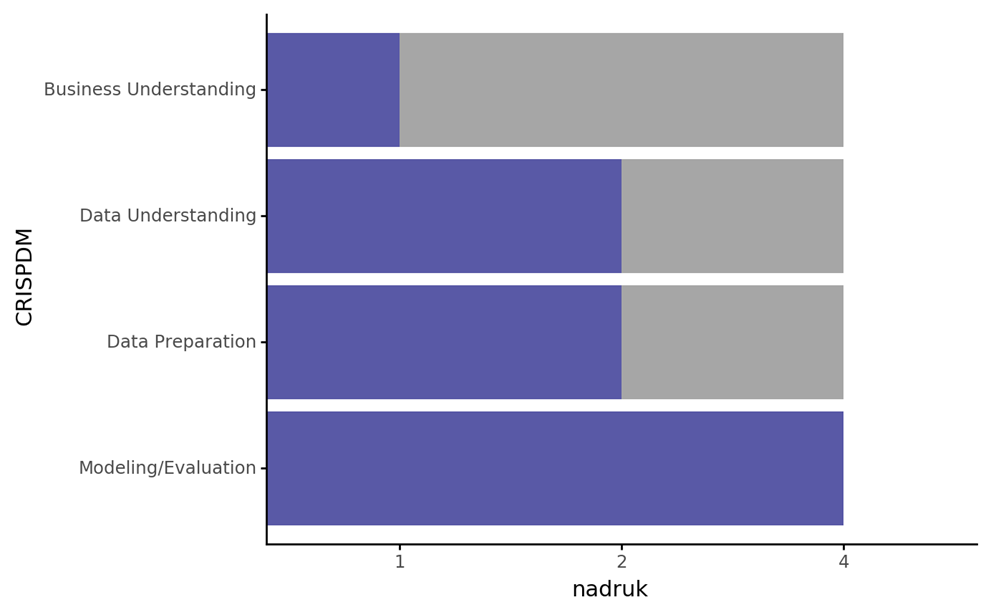
</div>

### Achtergrondinformatie:
- Google naar:
    - `statsmodels linear regression`
    - `interpret regression coefficients`
    - `linear regression overfitting`
    - `python seaborn pairplot`
    - `sklearn train test split`
- Datacamp course `Introduction to Regression with statsmodels in Python`

### Opdracht 
- Vul het onderstaande notebook aan op de gevraagde plekken. 



# Business Understanding
In het licht van klimaatverandereing en stijgende brandstofprijzen wordt het brandstofverbruik van een auto wordt een steeds belangerijker onderdeel van de keuze van een auto. Maar het is voor een consument lastig in te schatten of het brandstofverbruik van een auto goed is ten opzichte van andere vergelijkbare auto's. In deze analyse gaan we een regressiemodel bouwen waarbij we brandstofverbruik gaan voorspellen op basis van de eigenschappen van een set aan auto's (gewicht, aantal versnellingen, etc). Nadat we dit model gebouwd hebben kunnen we van een onbekende auto zeggen of het verbruik in de lijn der verwachting is gegeven zijn eigenschappen. 

- Begrijp je de vraag die gesteld wordt? 
- Heb je voldoende kennis van het domein (auto’s) om de data te kunnen begrijpen?


# Data Understanding 

1. In welk format is de data (aangeleverd)? 
2. Hoe kun je de databron benaderen vanuit python?
3. Data exploreren:
       a. Informatie over de database
        - Welke tabellen (evt. collections) staan er in de database?
        - Welke kolommen (variabelen) vinden we terug in elke tabel? Kun je aan elke kolom betekenis geven??
        - Wat is het aantal records per tabel?
        - Welke datatypes vinden we terug in de tabellen?
        - Zijn er lege cellen?
       b. Vul dit evt. aan met beschrijvende statistiek, kijk alvast vooruit naar het regressiemodel
       c. Visualiseer de data op een slimme manier, kijk alvast vooruit naar het regressiemodel
       d. [NIEUW] Zijn alle variabelen van nominaal of ratio meetniveau? Welke invloed heeft dit op de volgende stappen?
       e. [NIEUW] Welk type regressiemodel is waarschijnlijk geschikt om de verbanden te onderzoeken?

Korte uitleg bij de variabelen:
- `model`, de naam van de auto
- `mpg`, het verbruik van de auto in miles-per-gallon (mile = 1.6 km, gallon = 4l benzine)
- `cyl`, het aantal cyllinders van de auto
- `disp`, de cilinderinhoud
- `hp`, het aantal pk van de auto
- `drat`, ratio van de achteras
- `wt`, het gewicht van de auto (1000 kg)
- `qsec`, hoe lang het duurt om 1/4 mile te rijden vanuit stilstand.
- `vs`, motor met eenr echte vorm of een V-vorm
- `am`, automatische versnelling of niet (1 wel, 0 niet)
- `gear`, het aantal versnellingen
- `carb`, aantal carburateurs. 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype
# Handige Jupyter magic
%config IPCompleter.greedy = True
%matplotlib inline

In [2]:
#[10 min] Geef hieronder de code om de data te importeren, beschrijf de data,
#en maak een pairplot (zie stap a, b, en c).
#beantwoord de onderstaande vraag
#TIP: pas het aantal cellen aan naar de hoeveekheid die jij nodig hebt

df = pd.read_csv('mtcars.csv')
df.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [5]:
df.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [27]:
df2 = df.copy()
#df2['am'] = df2['am'].astype('category')
#df2['gear'] = df2['gear'].astype('category')
#df2['carb'] = df2['carb'].astype('category')
df2['cyl'] = df2['cyl'].astype(CategoricalDtype(categories=[4,6,8], ordered=True))
df2['am'] = df2['am'].astype(CategoricalDtype(categories=[0,1,2], ordered=True))
df2['vs'] = df2['vs'].astype(CategoricalDtype(categories=[0,1], ordered=True))
df2['gear'] = df2['gear'].astype(CategoricalDtype(categories=[3,4,5], ordered=True))
df2['carb'] = df2['carb'].astype(CategoricalDtype(categories=[1,2,3,4,5,6,7,8], ordered=True))

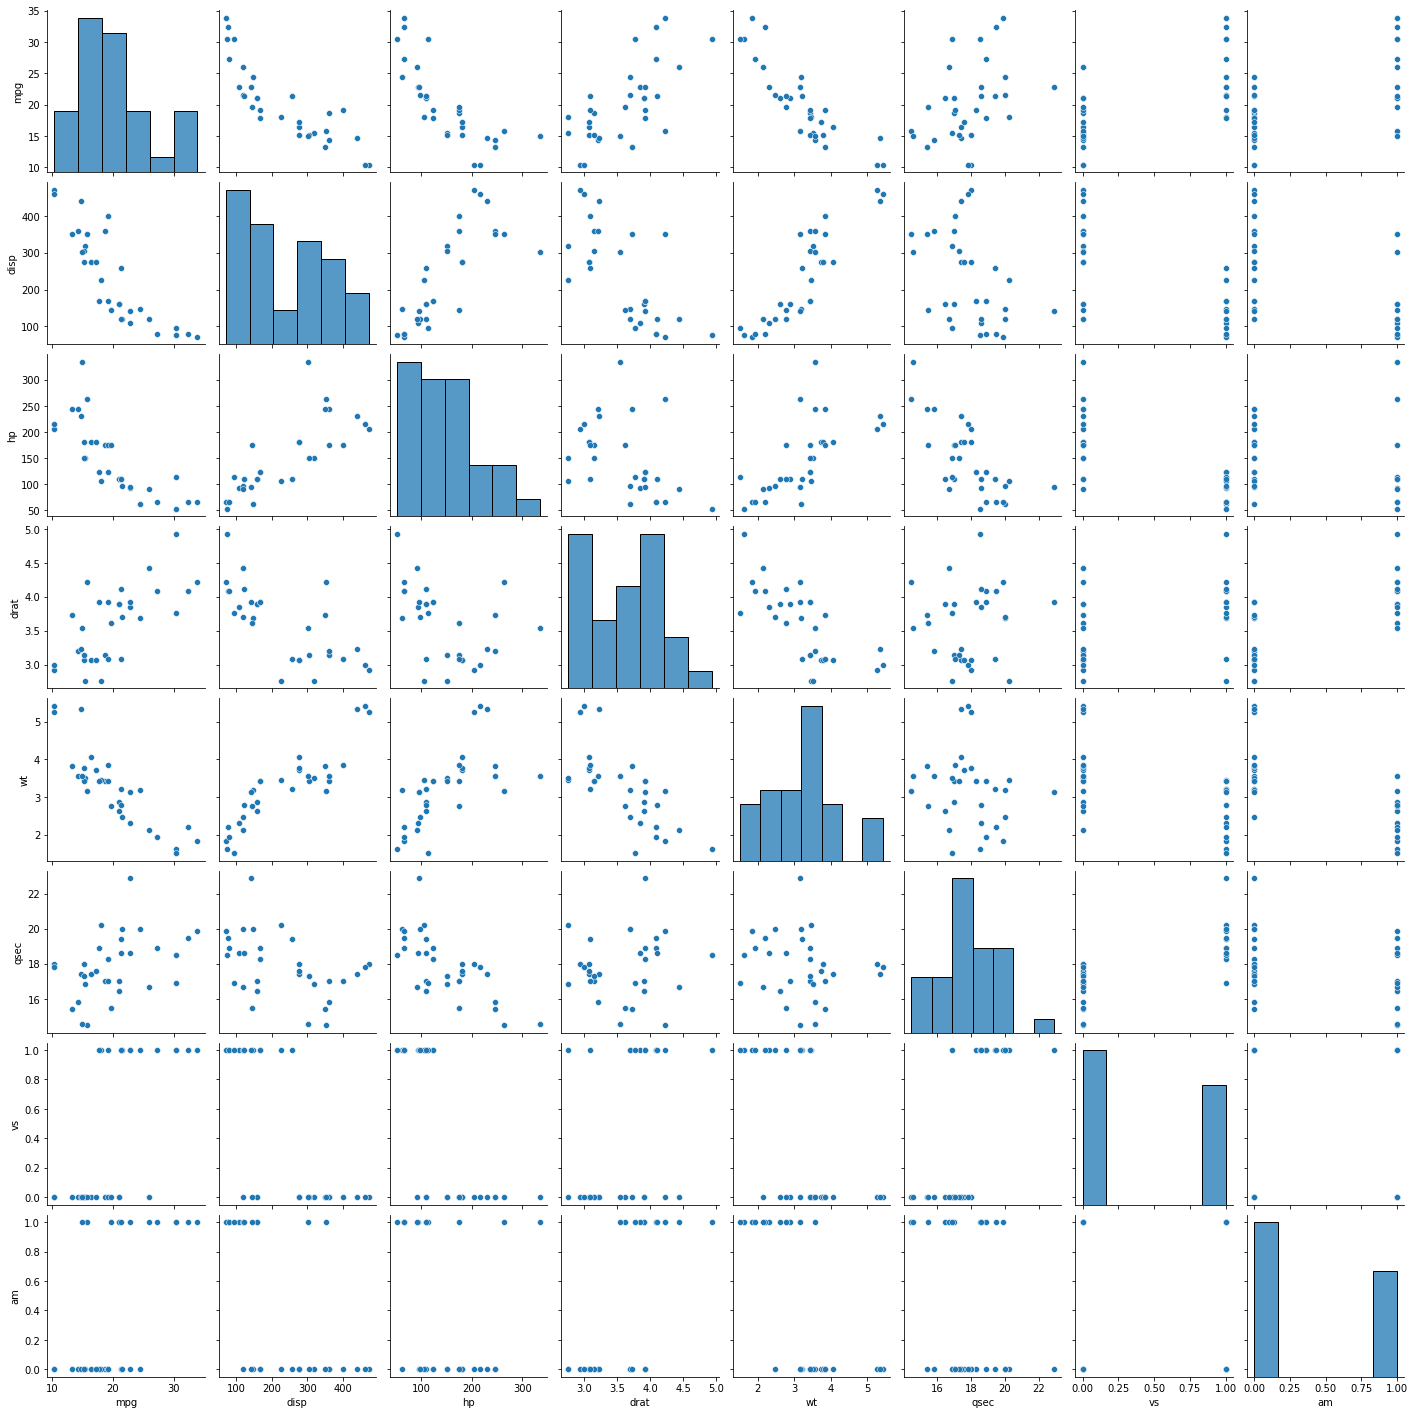

In [29]:
sns.pairplot(df2)

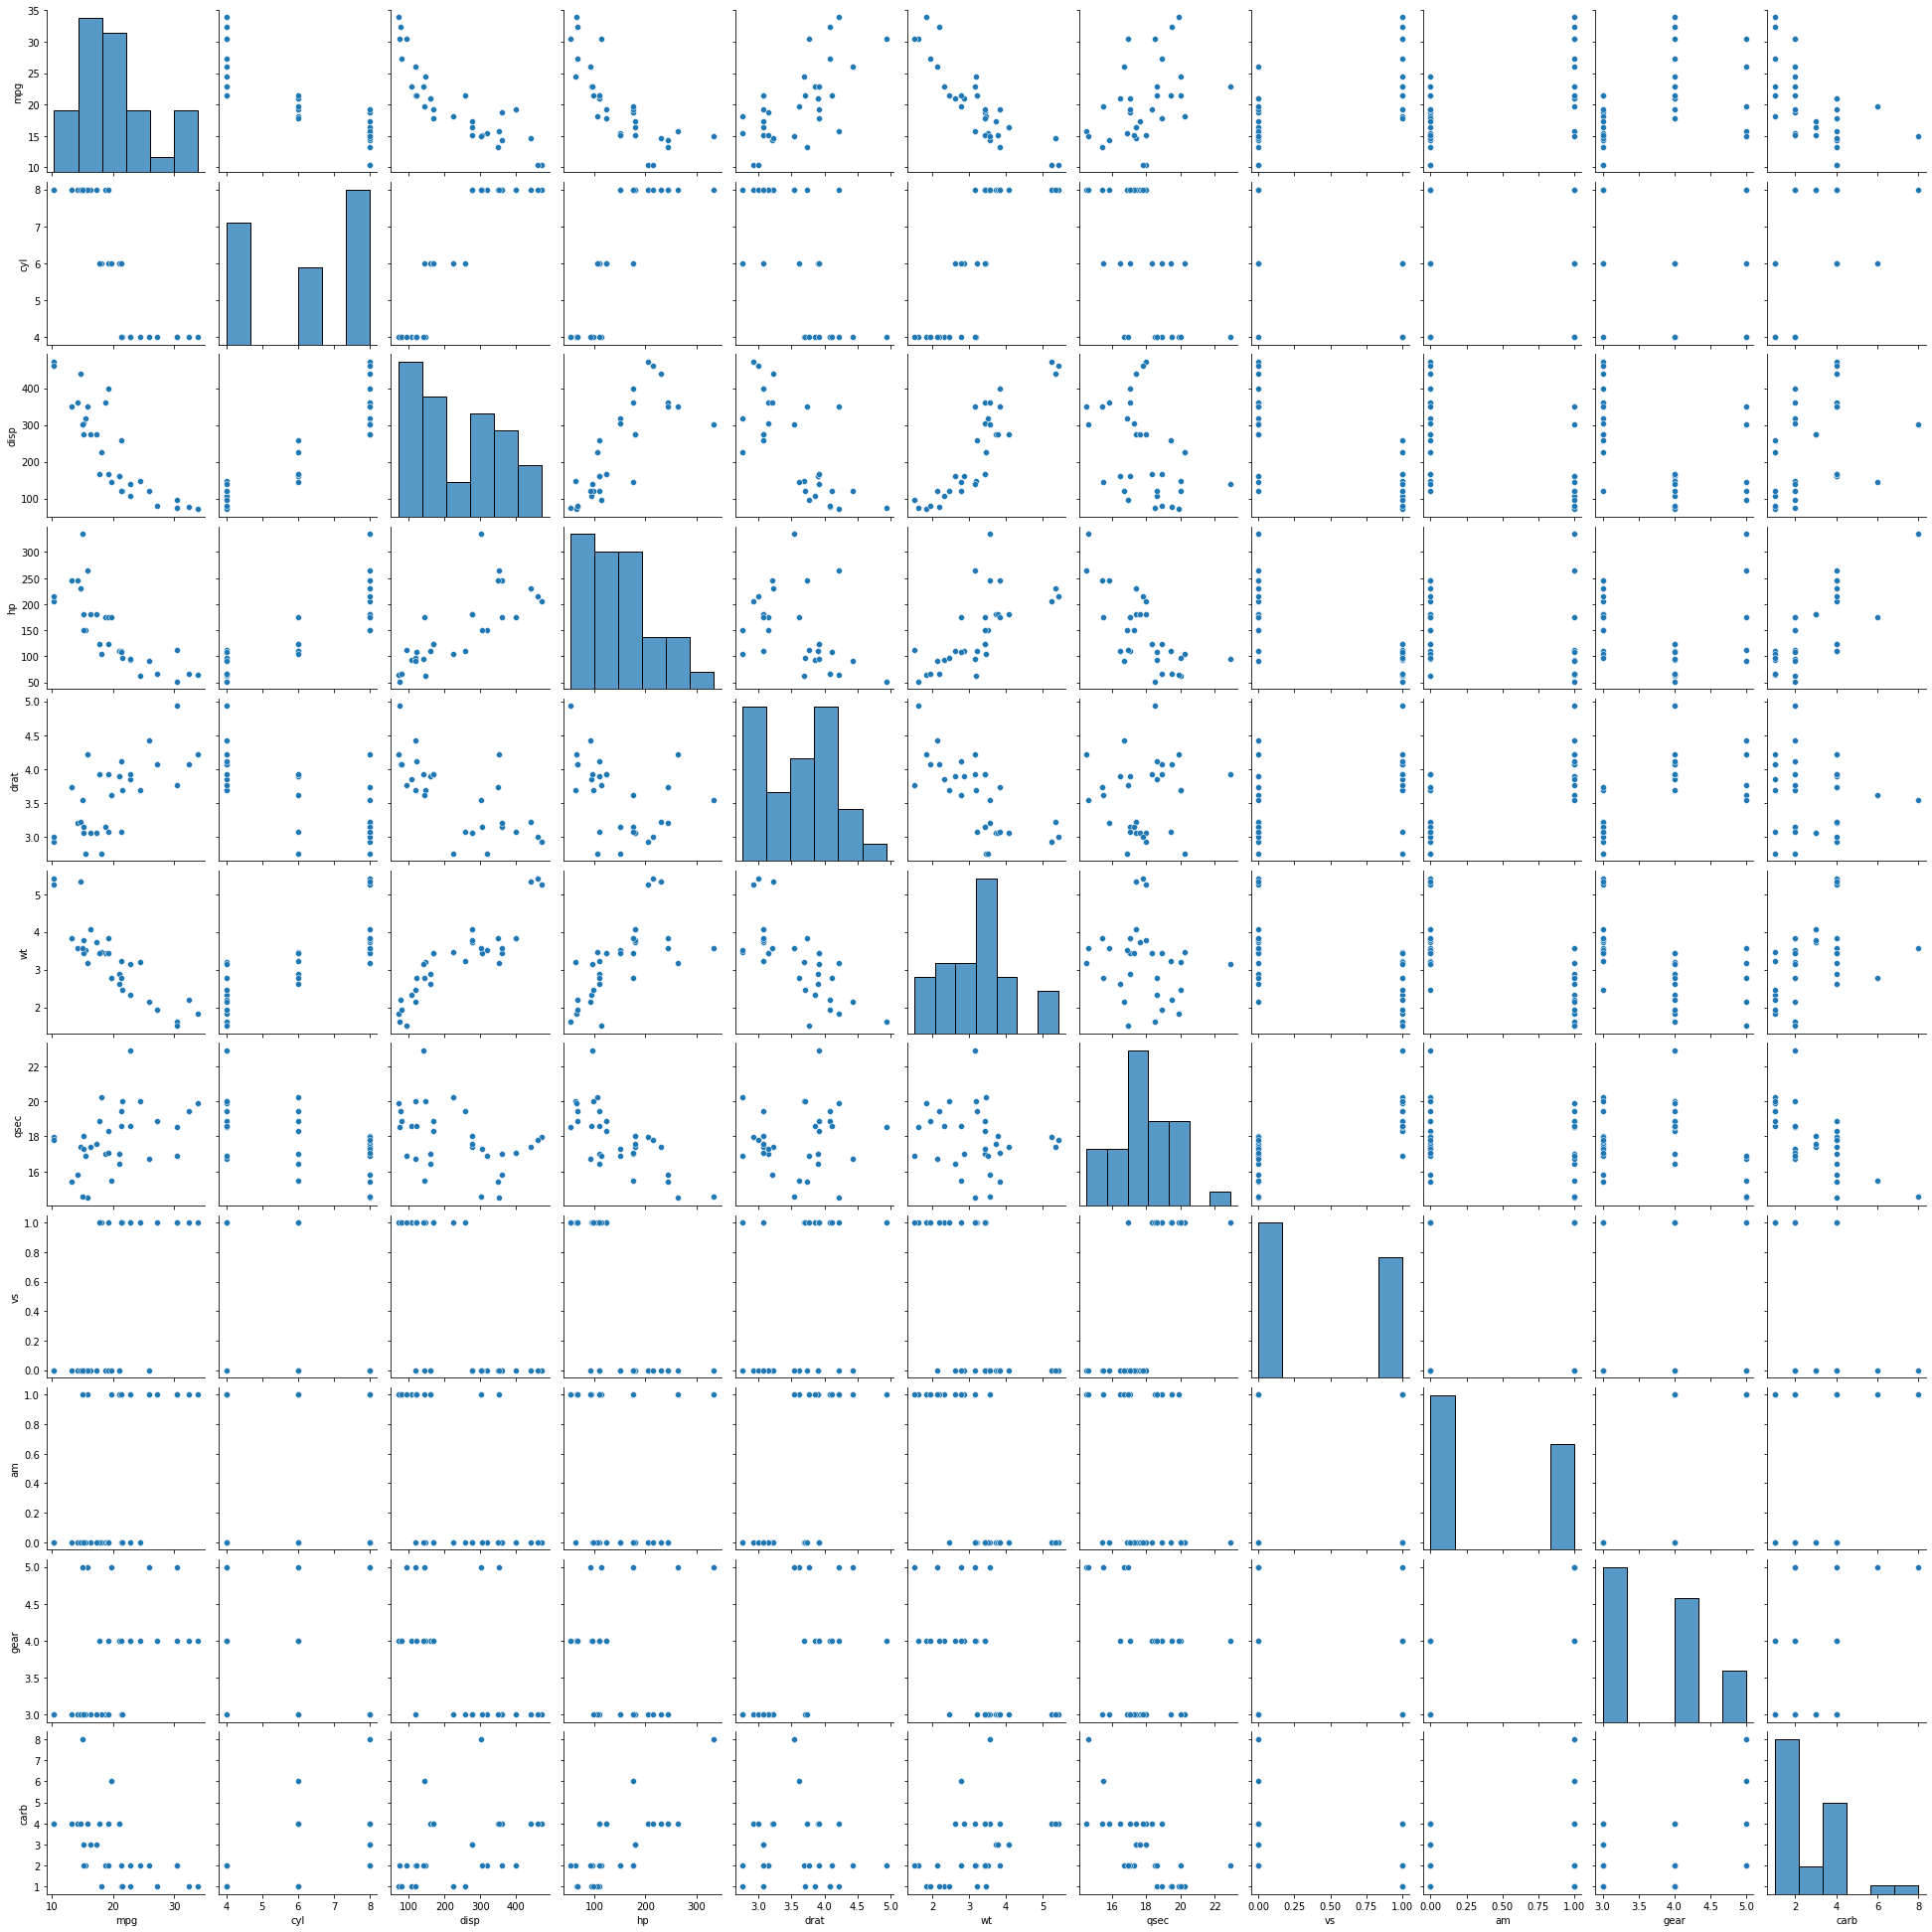

In [6]:
sns.pairplot(df)

**Wat kun je afleiden uit de soms wat afwijkende vorm van de pairplots (bijv cyl, 2e rij)?**


***


Het onderstaande pairplot laat het scatterplot zien van mpg versus de andere niet-categorische variabelen. Om de verbanden beter inzichtelijk te maken is een  regressielijn toegevoegd.

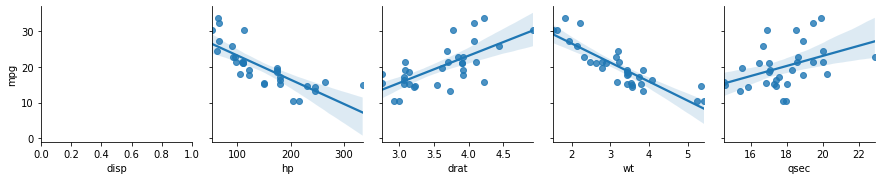

In [7]:
# [10 min] gebruik een pairplot om een serie scatterplots te maken van `mpg` vs 
# de niet categorische variabelen 'disp', 'hp', 'drat', 'wt', 'qsec' (zie stap c)
# voeg een regressielijn toe aan het pairplot en beantwoord onderstaande vraag!

sns.pairplot(df, y_vars=['mpg'] , x_vars=['disp', 'hp', 'drat', 'wt', 'qsec'], kind='reg')


In [8]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

Hier vallen de volgende zaken op:

**Vul dit stuk aan: geef een lijst met zaken die je opvallen. Richt je hier op het aangeven of de verschillende variabelen wel of niet een verband hebben met de afhankelijke feature `mpg`**

***
We kijken nu verder naar de samenhang tussen de verschillende variabelen

In [9]:
# [5 min] Gebruik een heatmap om de correlaties tussen alle variabelen te onderzoeken en beantwoord onderstaande vraag:


<Figure size 504x504 with 0 Axes>

<AxesSubplot:>

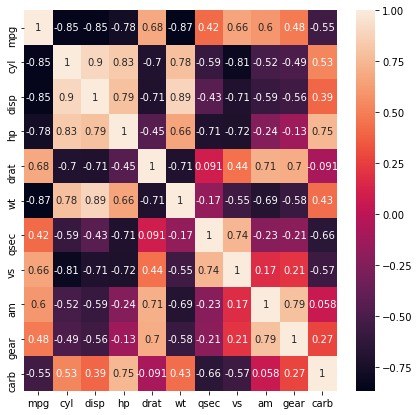

In [10]:


plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)

Vul dit stuk aan: wat zijn relevante en/of opvallende correlaties?
****


# Data preparation
Deze les doen we hier even niks. De 2e les komen we hier op terug

# Modeling

## Enkelvoudig regressiemodel
We beginnen met het maken van een serie aan enkelvoudige modellen: tussen `wt` en `qsec` aan de ene kant en `mpg` aan de andere kant. 

**Denk na: Welke van de bovenstaande variabelen zijn de afhankelijke en de onafhankelijke variabelen? Leg het verschil uit aan je collega**. 

In [11]:
# [20 min] Bouw hier met statsmodels twee regressiemodellen: `mpg vs wt` en `mpg vs qsec`
# Print de summary en geef antwoord op onderstaande vragen

In [12]:
# Importeren van lineaire regressiemodel (OLS: "ordinary least squares")
from statsmodels.formula.api import ols

<AxesSubplot:xlabel='wt', ylabel='mpg'>

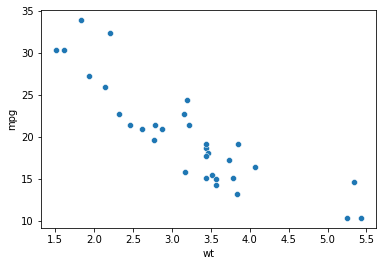

In [13]:
sns.scatterplot(x='wt', y='mpg', data=df) # plot om nog één keer naar de data te kijken

In [14]:
model = ols('mpg ~ wt', data=df).fit() # maak een model tussen mpg en wt

In [15]:
model.summary() # beschrijvende statistiek. Belangrijkste waarde is R_squared: hoe goed verklaart je model de data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           1.29e-10
Time:                        11:13:35   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
pred = model.get_prediction() # Ophalen van je voorspelling

In [17]:
pred_summary = pred.summary_frame() # Resultaat van je voorspelling (voor de plot)

<AxesSubplot:xlabel='wt', ylabel='mpg'>

<AxesSubplot:xlabel='wt', ylabel='mpg'>

<AxesSubplot:xlabel='wt', ylabel='mpg'>

<AxesSubplot:xlabel='wt', ylabel='mpg'>

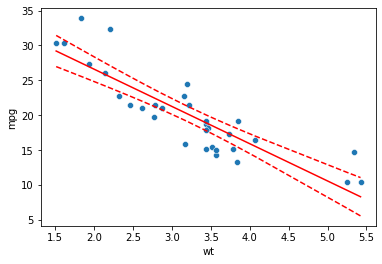

In [18]:
sns.scatterplot(x='wt', y='mpg', data=df) # oorspronkelijke data 
sns.lineplot(x=df['wt'], y=pred_summary['mean'], color='red') # de voorspelling
sns.lineplot(x=df['wt'], y=pred_summary['mean_ci_lower'], color='red', ls='--') # ondergrens
sns.lineplot(x=df['wt'], y=pred_summary['mean_ci_upper'], color='red', ls='--') # bovengrens (ls=linestyle)



In [36]:
df2 = pd.DataFrame({'wt': [1,2,3]})
df2.head()

,wt
0,1
1,2
2,3


In [37]:
model.predict(df2)

0    31.940655
1    26.596183
2    21.251711
dtype: float64

<AxesSubplot:xlabel='wt', ylabel='mpg'>

<AxesSubplot:xlabel='wt', ylabel='mpg'>

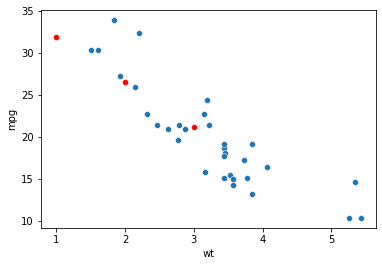

In [38]:
sns.scatterplot(x='wt', y='mpg', data=df) # oorspronkelijke data 
sns.scatterplot(x=df2['wt'], y=model.predict(df2), color='red')

In [19]:
model = ols('mpg~wt', data=df).fit()

ERROR! Session/line number was not unique in database. History logging moved to new session 351


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           1.29e-10
Time:                        11:13:38   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.get_prediction()

In [22]:
a = model.get_prediction()

In [23]:
a.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.282611,0.633580,21.988668,24.576553,16.928937,29.636284
1,21.919770,0.571432,20.752751,23.086790,15.590725,28.248816
2,24.885952,0.735918,23.383008,26.388897,18.486442,31.285462
3,20.102650,0.538442,19.003004,21.202296,13.785680,26.419620
4,18.900144,0.552656,17.771469,20.028818,12.578057,25.222231
5,18.793255,0.555283,17.659216,19.927293,12.470207,25.116302
6,18.205363,0.573424,17.034274,19.376452,11.875565,24.535160
7,20.236262,0.538656,19.136179,21.336345,13.919216,26.553308
8,20.450041,0.539752,19.347720,21.552362,14.132605,26.767477
9,18.900144,0.552656,17.771469,20.028818,12.578057,25.222231


**Vul dit stuk aan: geef een interpretatie van de coefficienten van de twee modellen en de R^2 scores. Welk model is beter**

*** 

Nu geeft Statsmodels per onafhankelijke variabele aan of deze wel of niet een significant effect op de afhankelijke variabelen hebben (P>|t|). 

Heeft de variabele `wt` hier een significant effect op `mpg`? 

Heeft de variabele `qsec` hier een significant effect op `mpg`? 

**vul hier je antwoord in**

***


## Les 2: Meervoudig model 
We kunnen met regressie ook meerdere variabelen uitvoeren om een nog beter model te maken: 

In [24]:
# [5 min] Maak hier met statmodels een meervoudig model met zowel `wt` als `qsec` als onafhankelijke variabelen,
# print de summary en geef antwoord op de onderstaande vragen


In dit model spelen dus zowel `wt` als `qsec` samen een rol. De interpretatie van de resultaten is:

**vul hier je antwoord in**
***


## Toevoegen van categorische variabelen
Tot nu toe hebben we alleen gewerkt met numerieke variabelen. In de praktijk werken we ook veel met categorische variabelen. Voorbeelden hiervan in de `mtcars` dataset zijn `cyl` en `am`, zoals we bij de data exploratie in de scatterplots hadden gezien. 
Als we deze variabelen nu in het regressie model zouden stoppen interpreteert Python deze simpelweg als een getal. Dit levert wat problemen op, een auto kan bijvoorbeeld geen 3.5 cillinders hebben. 

Je kunt dus niet zomaar de `cyl` variabele in de regressie stoppen, deze moet eerst voorbewerkt worden. Om eerst een beeld te krijgen van deze variabele gaan we even terug naar de **data understanding** en beginnen we met het maken van een boxplot (https://nl.wikipedia.org/wiki/Boxplot).

In [25]:
#[5 min] Visualeer het verbruikt (mpg) per cylinder dmv een boxplot en geef hieronder een interpretatie van de resultaten 


Interpretatie van de boxplots:

**vul hier je antwoord in** 
***


Statsmodels biedt een ingebouwde functie om om te gaan met categorische variabelen. Dit doe je door deze op de volgende manier op te nemen: `"mpg~C(cyl)"`. Je geeft hierbij met een hoofdletter C aan dat de variabele die erna komt als categorisch behandeld moet worden. Om dit verder te bestuderen maak je hieronder een enkelvoudig regressiemodel met `cyl` als categorische onafhankelijke variabele en `mpg` als afhankelijke variabele

In [26]:
# [5 min] maak je een regressiemodel met cyl als categorische onafhankelijke variabele 
# en mpg als afhankelijke variabele


Wat er nu met `cyl` is gebeurt is dat Statsmodels deze heeft geconverteerd naar zogeheten dummy-variabelen. Dit zijn variabelen die alleen ) of 1 als waarde kunnen hebbben.  

Aangezien we 3 opties hebben (4, 6 of 8 cylinders) zou dit de basis zou dit resulteren in 3 dummy variabelen, 1 voor iedere optie: 
- `cyl` = 8, `0, 1, 0`
- `cyl` = 6, `1, 0, 0`
- `cyl` = 4, `0, 0, 1`

Dit is een beetje overbodig, want als er geen 1 bij 6 of 8 cylinders staat weet je al dat het dan alleen nog maar een 4 cylinder kan zijn (andere opties hebben we niet). Daarom hoeft de dummy voor 4 cylinders niet gemaakt te worden. Het resultaat is hier dat de ene `cyl` variabele wordt omgezet naar twee nieuwe variabelen. De volgende combinaties van `0` en `1` zijn mogelijk:

- `cyl` = 8, `0, 1`
- `cyl` = 6, `1, 0`
- `cyl` = 4, `0, 0`

Je ziet dat we dus maar 2 variabelen nodig hebben voor drie verschillende aantallen cillinders. 

Nu we de werking snappen gaat we terug naar ons oorspronkelijke model met  `wt` en `qsec` als verklarende variabelen en voegen we `cyl` als extra toe.

In [27]:
#[5 min]: breidt het model met 'wt' en 'qsec' als verklarende variabelen uit met 'cyl' en interpreteer de resultaten


Interpretatie van het model met 'cyl':

**vul hier je antwoord in** 
***
 

In [28]:
#[3 min maak] een boxplot van 'wt' per 'cyl'


Je ziet hier dat het gewicht bijna lineair stijgt met het aantal cylinders. In dit geval voegt het aantal cillinders dus niet zoveel meer toe aan het model omdat de informatie al versleuteld zit in `wt`. 

## Modelkeuze rekeninghoudend met overfitting
Je kunt een model steeds verder en verder blijven uitbreiden met meer variabelen om het model nog beter te maken. Een issue waar je hier tegenaan kan lopen wordt overfitting genoemd: het model wordt zo sterk op een specfieke situatie gericht dat het niet meer in andere situaties bruikbaar is. Dit maakt het model onbruikbaar in een praktische setting met onbekende data. 

Tot nu toe hebben we dezelfde data gebruikt om het model te fitten als ook om het model te beoordelen. Dit werkt overfitting in de hand, het model heeft een oneerlijke voorsprong doordat het de data al kent die het gaat voorspellen. 

Een methode om dit tegen te gaan is om de data te splitsen in een trainings- en een testset. Helaas biedt statsmodels daarvoor geen functie, dus gebruiken deze uit sklearn:

In [29]:
# [10 min] splits je dataset in twee delen: 70% training, 30% test gebruik random_state =42 
# zorg ervoor dat het aantal cylinders gelijk is verdeeld over de test- en trainset

Nu kunnen de de `train` data gebruiken om het model te maken, en de `test` data om de performance te bepalen:

In [30]:
# [20 min]
# Bouw nogmaal 3 regressie modellen met de volgende onafhankelijke variabelen
# 'wt'; 'wt' en 'qsec'; 'wt'','qsec'en 'cyl' en bepaal de R-squared waarden 

# Bereken ook de r-squared van het gefitte model op de test-set 
# dit laatste kun je berekenen door het kwadraat van de  correlatie 
# uit te rekenen van de op basis van ons model voorspelde mpg
# (bijv results.predict(test_data)) en de werkelijke mpg (test_data['mpg'])
# dit resulteerd dan in een dergelijk statement:
# print("R-Squared on test_data:", test_data['mpg'].corr(results.predict(test_data))**2)



In [31]:
#[EXTRA UITDAGING: plot zowel de verschillende R2's van de traindata 
# en de testdata (Y-as R2 X-as het model en dus 2 lijnen )]

Interpretatie van resultaten:

**vul hier je antwoord in** 
***


# Evaluation
Nu we een model hebben kunnen we voor de test dataset voorspellen hoeveel we verwachten dat deze auto's verbruiken. Als we daarna het verschil uitrekenen met het daadwerkelijke verbruik:

In [32]:
model=ols("mpg~wt+qsec", data=train_data)
results = model.fit()
predicted=results.predict(test_data) 
residuals = test_data['mpg'] - predicted
residual_data = pd.DataFrame({'mpg': test_data['mpg'], 'residual': residuals, 'model': test_data['model']})
print(residual_data)
residual_data.plot(x='mpg', y='residual', kind='scatter')

NameError: name 'train_data' is not defined

We zien dat binnen de testset de Toyota Corona 4.6 miles per gallon meer rijdt dat je zou verwachten op basis van ons model met `const`, `wt` en `qsec`. Gegeven ons model heeft deze auto dus een zeer goed verbruik. Qua verbruik in zijn klasse is een Corolla dus een goede keuze.